<a href="https://colab.research.google.com/github/Bala534/Regproject/blob/main/Cc_and_Cu(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [11]:
data = pd.read_excel('Cu and Cu Table of Data.xlsx')
data.head()

,S NO,HC (%),NQF (%),C (%),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,0.0,0.00,23.02,2.00,15.00,0.84,2.05
1,2,0.1,0.01,23.02,1.98,15.01,0.85,2.05
2,3,0.2,0.02,23.03,1.96,15.04,0.86,2.06
3,4,0.3,0.03,23.03,1.96,15.09,0.87,2.06
4,5,0.4,0.04,23.04,1.93,15.14,0.88,2.06


In [12]:
del data['S NO']

In [13]:
data.shape

(121, 7)

In [14]:
data.isna().any()

HC (%)        False
NQF (%)       False
C (%)         False
Unnamed: 4    False
Unnamed: 5    False
Unnamed: 6    False
Unnamed: 7    False
dtype: bool

In [15]:
data.isna().sum().sum()

0

In [17]:
data.rename(columns = {'Unnamed: 4':'Ac','Unnamed: 5':'Φ','Unnamed: 6':'Cc','Unnamed: 7':'Cu'}, inplace = True) # Changing the column names

**Conduct Pearson’s regression to determine the agreement between all parameters with the outputs (Cu and Cc) and present basic linear fittings.**

In [18]:
x = data['Cc'] # taking the Cc column
y = data['Cu'] # taking the Cu column

In [19]:
from scipy.stats import pearsonr 

In [20]:
r, _  = pearsonr(x,y) # calculating the pearson's correlation coefficient for two variables
r 

0.9657678969639488

In [21]:
np.corrcoef(x, y)

array([[1.       , 0.9657679],
       [0.9657679, 1.       ]])

In [22]:
corMat = data.corr()
print(corMat)

           HC (%)   NQF (%)     C (%)        Ac         Φ        Cc        Cu
HC (%)   1.000000  1.000000  0.996439 -0.993883  0.992387  0.994610  0.982764
NQF (%)  1.000000  1.000000  0.996439 -0.993883  0.992387  0.994610  0.982764
C (%)    0.996439  0.996439  1.000000 -0.997008  0.993742  0.984554  0.983685
Ac      -0.993883 -0.993883 -0.997008  1.000000 -0.991463 -0.983404 -0.981070
Φ        0.992387  0.992387  0.993742 -0.991463  1.000000  0.980971  0.972374
Cc       0.994610  0.994610  0.984554 -0.983404  0.980971  1.000000  0.965768
Cu       0.982764  0.982764  0.983685 -0.981070  0.972374  0.965768  1.000000


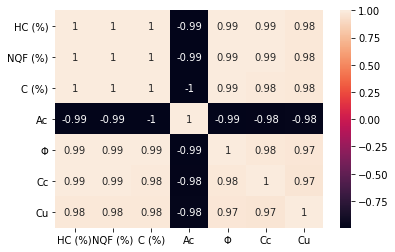

In [23]:
sns.heatmap(corMat, annot=True)
plt.show()

From the above we can say that there is a positive correlation between Cc and Cu.

which clearly says x and y both are strongly correlated with each other.

**Present frequency histograms of the variables.**

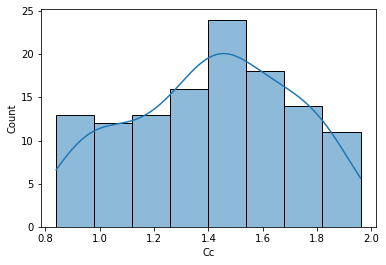

In [24]:
sns.histplot(data=data, x="Cc",kde=True) # histogram for the Cc variable

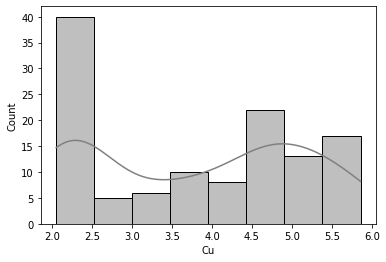

In [25]:
sns.histplot(data=data, x="Cu",color='grey',kde=True) # histogram for the Cu variable

**Train, Validate and Test. Present the architecture of the program.**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [35]:
features = data[['HC (%)','NQF (%)','C (%)','Ac','Φ']].values
labels = data[['Cc']].values

In [36]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2)

In [38]:
model =SVR(kernel='linear')  
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred1 = model.predict(x_test)
y_pred1

array([1.00895766, 1.82389042, 1.57875141, 1.14317491, 1.49452863,
       1.68006409, 1.21782752, 1.01701149, 1.70881927, 1.64461724,
       1.31504796, 1.27801849, 1.23290444, 1.30732554, 1.57127924,
       0.94377819, 1.46444108, 1.52429967, 1.24753227, 1.4274116 ,
       1.48692389, 1.66588535, 1.72339571, 1.2252997 , 1.28542438])

In [40]:
mean_absolute_error(y_test,y_pred1)

0.034682960358232554

In [41]:
mean_squared_error(y_test,y_pred1)

0.0018993085134429103

In [42]:
from math import sqrt
rmse1 = sqrt(mean_squared_error(y_test,y_pred1)) # calculating the root mean squared error for actual and predicted values
rmse1

0.04358105681879353

In [43]:
r2_score(y_test,y_pred1)

0.9707178116877107

In [44]:
x11 = np.array(['MAE','MSE','RMSE','R2_error'])
y11 = np.array([0.0346,0.0018,0.0435,0.9707])

Text(0, 0.5, 'value')

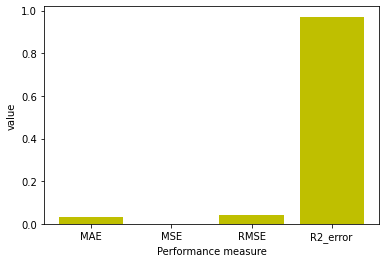

In [45]:
plt.bar(x11,y11,color='y')
plt.xlabel('Performance measure')
plt.ylabel('value')

In [46]:
features1 = data[['HC (%)','NQF (%)','C (%)','Ac','Φ']].values
labels1 = data[['Cu']].values

In [47]:
x_train,x_test,y_train,y_test = train_test_split(features1,labels1,test_size=0.2)

In [48]:
model1 =SVR(kernel='linear')  
model1.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred2 = model1.predict(x_test)
y_pred2

array([2.00416167, 2.77294141, 3.3491031 , 4.53053006, 2.68588717,
       3.44870994, 3.3838403 , 5.67870493, 1.65970393, 5.82395275,
       4.80363755, 4.34193559, 4.44459924, 5.43807766, 5.34340724,
       1.73951936, 6.03543279, 3.31897067, 5.18880361, 4.00592921,
       4.08339685, 5.24873682, 4.94258636, 2.23923397, 5.09413318])

In [51]:
mean_absolute_error(y_test,y_pred2)

0.15082569068814503

In [52]:
mean_squared_error(y_test,y_pred2)

0.046887312023559294

In [53]:
from math import sqrt
rmse2 = sqrt(mean_squared_error(y_test,y_pred2)) # calculating the root mean squared error for actual and predicted values
rmse2

0.21653478247976535

In [54]:
r2_score(y_test,y_pred2)

0.9710539671268553

In [55]:
x22 = np.array(['MAE','MSE','RMSE','R2_error'])
y22 = np.array([0.1508,0.0468,0.2165,0.9710])

Text(0, 0.5, 'value')

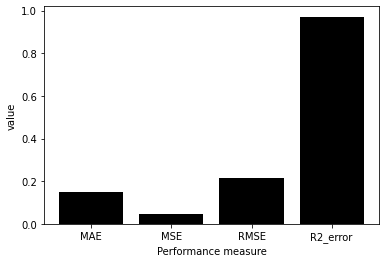

In [56]:
plt.bar(x22,y22,color='black')
plt.xlabel('Performance measure')
plt.ylabel('value')

In [57]:
from sklearn.model_selection import cross_validate,KFold,cross_val_score

In [58]:
cross_val_score(SVR(),features,labels).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-2.010203509686858

In [59]:
a = data['Cc'].tail(25)
b = np.array([1.00895766, 1.82389042, 1.57875141, 1.14317491, 1.49452863,
       1.68006409, 1.21782752, 1.01701149, 1.70881927, 1.64461724,
       1.31504796, 1.27801849, 1.23290444, 1.30732554, 1.57127924,
       0.94377819, 1.46444108, 1.52429967, 1.24753227, 1.4274116 ,
       1.48692389, 1.66588535, 1.72339571, 1.2252997 , 1.28542438])

Text(0, 0.5, 'Predicted Cc')

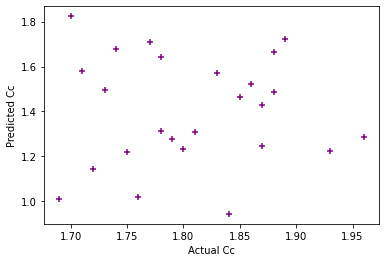

In [60]:
plt.scatter(a,b,color='purple',marker='+')
plt.xlabel('Actual Cc')
plt.ylabel('Predicted Cc')

In [61]:
c = data['Cu'].tail(25)
d = np.array([2.00416167, 2.77294141, 3.3491031 , 4.53053006, 2.68588717,
       3.44870994, 3.3838403 , 5.67870493, 1.65970393, 5.82395275,
       4.80363755, 4.34193559, 4.44459924, 5.43807766, 5.34340724,
       1.73951936, 6.03543279, 3.31897067, 5.18880361, 4.00592921,
       4.08339685, 5.24873682, 4.94258636, 2.23923397, 5.09413318])

Text(0, 0.5, 'Predicted Cu')

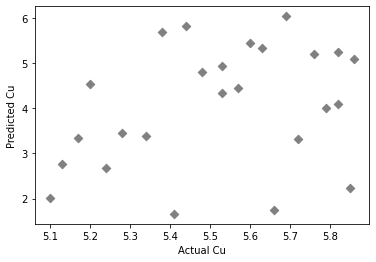

In [62]:
plt.scatter(c,d,color='grey',marker='D')
plt.xlabel('Actual Cu')
plt.ylabel('Predicted Cu')

**Present the parametric study graph**

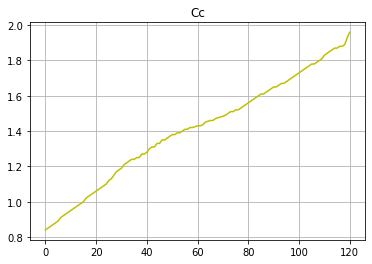

In [63]:
z = data['Cc']
plt.plot(z,color='y')
plt.title('Cc')
plt.grid()

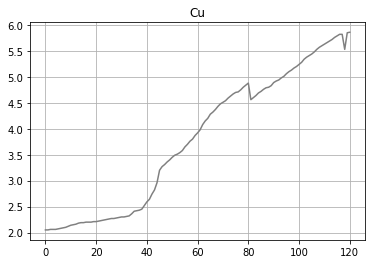

In [64]:
p = data['Cu']
plt.plot(p,color='grey')
plt.title('Cu')
plt.grid()

**Conduct sensitivity analysis to determine the influence of each parameter on the predicted parameters.**

In [65]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

M, n = make_regression(n_samples=500, n_features=5, n_informative=2, noise=0.3)
M = pd.DataFrame(M, columns=['HC (%)','NQF (%)','C (%)','Ac','Φ'])

model = XGBRegressor()
model.fit(M, n)

[15:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

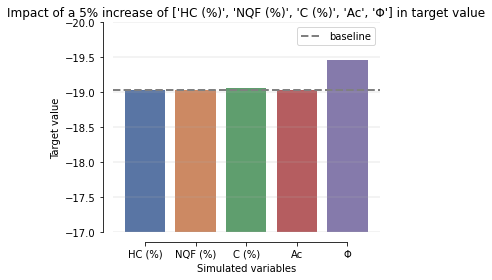

In [66]:
class Simulate:
    def __init__(self, obs, var):
        self.obs = obs
        self.var = var

    def simulate_increase(self, model, percentage):
        baseline = model.predict(self.obs)
        plus = {}
        for ivar in self.var:
            M_plus = self.obs.copy()
            M_plus[ivar] = M_plus[ivar] + M_plus[ivar] * (percentage / 100)
            plus[ivar] = model.predict(M_plus)
        b = pd.DataFrame(
            plus, index=['simulated'
                         ]).T.reset_index().rename(columns={'index': 'test'})
        b['baseline'] = baseline[0]
        return b

    @staticmethod
    def plot_simulation(d, **kwargs):
        fig, ax = plt.subplots()
        sns.barplot(x='test', y='simulated', data=d, palette='deep', ax=ax)
        ax.axhline(d['baseline'].values[0], color='grey', linestyle='--', linewidth=2)
        ax.plot([0, 0], [-100, -100], color='grey', linestyle='--', linewidth=2, label='baseline')

        maxi = int(d['simulated'].max() + d['simulated'].max() * 0.1)
        mini = int(d['simulated'].min() - d['simulated'].min() * 0.1)
        ax.set_ylim([mini, maxi])

        ax.set_xlabel('Simulated variables')
        ax.set_ylabel('Target value')
        ax.set_title(kwargs.get('title'))
        ax.legend()

        ax.grid(axis='y', linewidth=.3)
        sns.despine(offset=10, trim=True)
        plt.tight_layout()
        plt.show()


VAR_OPTIMIZE = ['HC (%)','NQF (%)','C (%)','Ac','Φ']
PERC = 5
ROW = M.iloc[[29]]

S = Simulate(obs=ROW, var=VAR_OPTIMIZE)
d = S.simulate_increase(model=model, percentage=PERC)
S.plot_simulation(d, title=f'Impact of a {PERC}% increase of {VAR_OPTIMIZE} in target value')